# {Project Title}📝

![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below -->

Some college football teams/programs are known for winning all the time. What is the difference between these teams and teams that do not.

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->

How do college football dynasties happen? What gives a college football team the edge to win? Are there certain factors that great teams have that help them win?

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->

The answers could be anywhere from ability to recruit, if it was just straight ability to coach, could it be location and weather, and so on. As for graphics it will be charts that can describe different aspects of the game and give percentages and numbers back showing different things including win probability.

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->

I found a great website that allows you to query for data and download csv files. I have also found a dataset on Kaggle. I am also going to use Pro Football Focus' (PFF) data.

## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->

Working for the team here at UC gives me excellent resources and I am going to start with finding data I think I will need. I have a meeting scheduled with the guy who is in charge of the teams analytics about what he does and where he finds his data and how he uses it.

In [1]:
# Start your code here
import opendatasets as od
import pandas as pd

od.download('https://www.kaggle.com/datasets/jeffgallini/college-football-team-stats-2019', './data')

Dataset URL: https://www.kaggle.com/datasets/jeffgallini/college-football-team-stats-2019


100%|██████████| 585k/585k [00:00<00:00, 6.02MB/s]

In [5]:
import pandas as pd


df = pd.read_csv('Data/Data1.csv')



print(df.head())

   Year  TeamId        Team         Conference Division  ExpectedWins  \
0  2015    2132  Cincinnati  American Athletic     East           8.3   
1  2006    2132  Cincinnati           Big East      NaN           0.0   
2  1954    2132  Cincinnati   FBS Independents      NaN           0.0   
3  1982    2132  Cincinnati   FBS Independents      NaN           0.0   
4  1965    2132  Cincinnati    Missouri Valley      NaN           0.0   

   Total Games  Total Wins  Total Losses  Total Ties  ...  \
0           13           7             6           0  ...   
1           13           8             5           0  ...   
2           10           8             2           0  ...   
3           11           6             5           0  ...   
4           10           5             5           0  ...   

   ConferenceGames Losses  ConferenceGames Ties  HomeGames Games  \
0                       4                     0                6   
1                       3                     0           

In [6]:
import pandas as pd


df = pd.read_csv('Data/Recruiting.csv')



print(df.head())

   Year  Rank        Team  Points
0  2000    44  Cincinnati    0.00
1  2001    51  Cincinnati    0.00
2  2002    76  Cincinnati   87.58
3  2003    96  Cincinnati   82.93
4  2004   104  Cincinnati   72.99


## Explatory Data Analysis


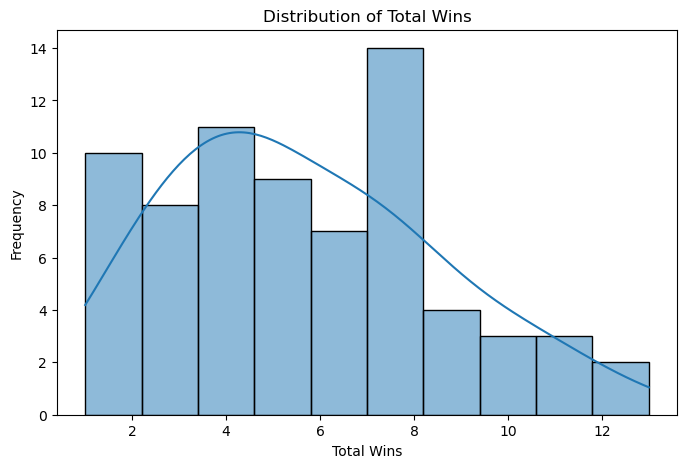

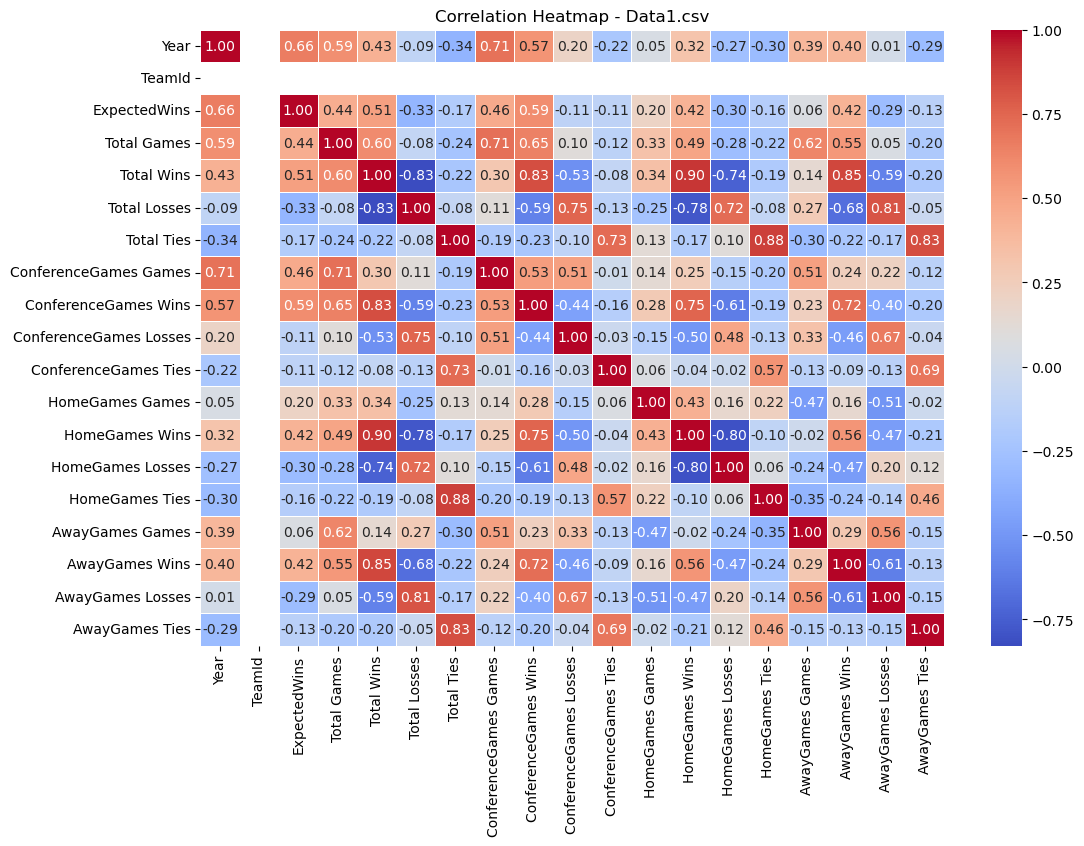

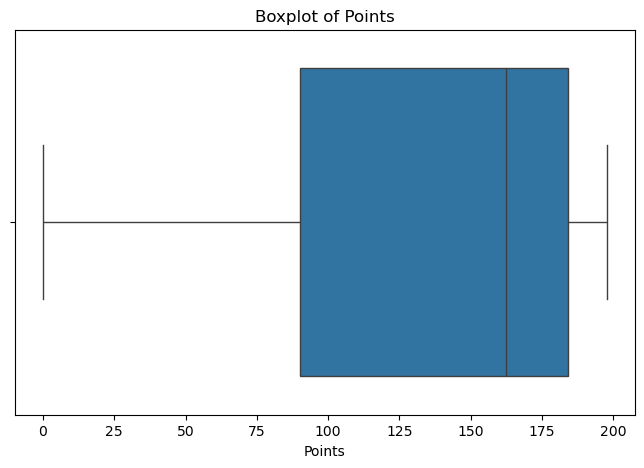

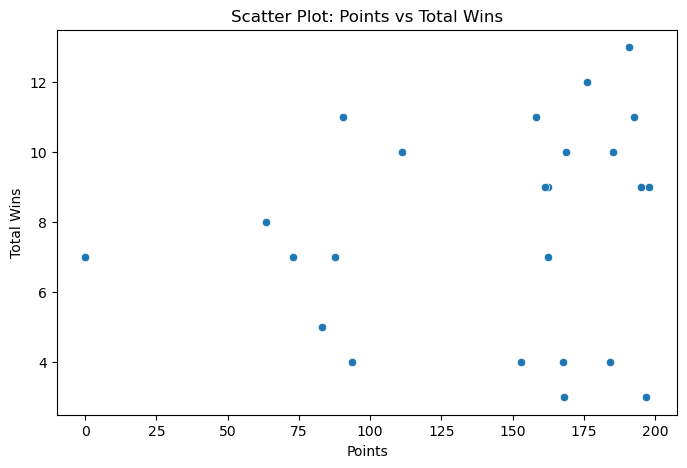

{'Data1 Summary':               Year  TeamId  ExpectedWins  Total Games  Total Wins  \
 count    71.000000    71.0     71.000000    71.000000   71.000000   
 mean   1989.000000  2132.0      1.511268    11.211268    5.633803   
 std      20.639767     0.0      3.117488     1.433432    2.874715   
 min    1954.000000  2132.0      0.000000     5.000000    1.000000   
 25%    1971.500000  2132.0      0.000000    10.500000    3.500000   
 50%    1989.000000  2132.0      0.000000    11.000000    5.000000   
 75%    2006.500000  2132.0      0.000000    12.000000    7.500000   
 max    2024.000000  2132.0     10.900000    14.000000   13.000000   
 
        Total Losses  Total Ties  ConferenceGames Games  ConferenceGames Wins  \
 count     71.000000   71.000000              71.000000             71.000000   
 mean       5.408451    0.169014               5.746479              2.746479   
 std        2.302654    0.477670               2.162791              2.109288   
 min        1.000000    0.0

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


data1 = pd.read_csv("./Data/Data1.csv")
recruiting_data = pd.read_csv("./Data/Recruiting.csv")

merged_data = pd.merge(data1, recruiting_data, on=["Year", "Team"], how="left")

data1_summary = data1.describe()
recruiting_data_summary = recruiting_data.describe()

plt.figure(figsize=(8, 5))
sns.histplot(data=data1, x="Total Wins", bins=10, kde=True)
plt.title("Distribution of Total Wins")
plt.xlabel("Total Wins")
plt.ylabel("Frequency")
plt.show()

numeric_data1 = data1.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data1.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap - Data1.csv")
plt.show()


plt.figure(figsize=(8, 5))
sns.boxplot(data=recruiting_data, x="Points")
plt.title("Boxplot of Points")
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(data=merged_data, x="Points", y="Total Wins")
plt.title("Scatter Plot: Points vs Total Wins")
plt.xlabel("Points")
plt.ylabel("Total Wins")
plt.show()

data1_missing = data1.isnull().sum()
recruiting_data_missing = recruiting_data.isnull().sum()
data1_duplicates = data1.duplicated().sum()
recruiting_data_duplicates = recruiting_data.duplicated().sum()

{
    "Data1 Summary": data1_summary,
    "Recruiting Data Summary": recruiting_data_summary,
    "Missing Values in Data1": data1_missing,
    "Missing Values in Recruiting Data": recruiting_data_missing,
    "Duplicate Values in Data1": data1_duplicates,
    "Duplicate Values in Recruiting Data": recruiting_data_duplicates
}


## Data Cleaning

In [5]:
data1_cleaned = data1.drop(columns=['Division'])

missing_values_data1 = data1_cleaned.isnull().sum()

data1_cleaned_info = data1_cleaned.info()

upper_limit = data1_cleaned['Total Wins'].quantile(0.95)
data1_cleaned = data1_cleaned[data1_cleaned['Total Wins'] <= upper_limit]

data1_cleaned = data1_cleaned.drop_duplicates()

merged_cleaned_data = pd.merge(data1_cleaned, recruiting_data, on=["Year", "Team"], how="left")

merged_cleaned_missing = merged_cleaned_data.isnull().sum()
merged_cleaned_shape = merged_cleaned_data.shape

{
    "Missing Values in Cleaned Data1": missing_values_data1,
    "Data1 Cleaned Info": data1_cleaned_info,
    "Outliers Removed (95th Percentile of Total Wins)": upper_limit,
    "Missing Values in Merged Dataset": merged_cleaned_missing,
    "Merged Dataset Shape": merged_cleaned_shape
}


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    71 non-null     int64  
 1   TeamId                  71 non-null     int64  
 2   Team                    71 non-null     object 
 3   Conference              71 non-null     object 
 4   ExpectedWins            71 non-null     float64
 5   Total Games             71 non-null     int64  
 6   Total Wins              71 non-null     int64  
 7   Total Losses            71 non-null     int64  
 8   Total Ties              71 non-null     int64  
 9   ConferenceGames Games   71 non-null     int64  
 10  ConferenceGames Wins    71 non-null     int64  
 11  ConferenceGames Losses  71 non-null     int64  
 12  ConferenceGames Ties    71 non-null     int64  
 13  HomeGames Games         71 non-null     int64  
 14  HomeGames Wins          71 non-null     int6

{'Missing Values in Cleaned Data1': Year                      0
 TeamId                    0
 Team                      0
 Conference                0
 ExpectedWins              0
 Total Games               0
 Total Wins                0
 Total Losses              0
 Total Ties                0
 ConferenceGames Games     0
 ConferenceGames Wins      0
 ConferenceGames Losses    0
 ConferenceGames Ties      0
 HomeGames Games           0
 HomeGames Wins            0
 HomeGames Losses          0
 HomeGames Ties            0
 AwayGames Games           0
 AwayGames Wins            0
 AwayGames Losses          0
 AwayGames Ties            0
 dtype: int64,
 'Data1 Cleaned Info': None,
 'Outliers Removed (95th Percentile of Total Wins)': 11.0,
 'Missing Values in Merged Dataset': Year                       0
 TeamId                     0
 Team                       0
 Conference                 0
 ExpectedWins               0
 Total Games                0
 Total Wins                 0
 Total 

## Resources and References
*What resources and references have you used for this project?*
📝 <!-- Answer Below -->

In [6]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 2682 bytes to source.py
